# Data Series Analysis of USDBRL and USDCNH

The data for the two series comes from the FRED database. After retrieving the data for the last 5 years, we merge it into one single dataframe and compute the log returns. 
Then, we plot the two series with scatter plot and draw the linear regression and write the equation to see if there 
is explanatory power into on currency or the other.
Finally we compute the Beta of the two currencies to see the hedge ratio in case of a pair trade.

In [87]:
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np
import pandas as pd
import pandas_datareader.data as web
import seaborn as sns
from sklearn.linear_model import LinearRegression
style.use('ggplot')

In [88]:
start = dt.datetime(2015,1,4)
end = dt.datetime(2020,12,31)

In [89]:
df1 = web.DataReader('DEXBZUS', 'fred', start, end)
df2 = web.DataReader('DEXCHUS', 'fred', start, end)

In [90]:
df1.to_csv('DEXBZUS.csv')
df2.to_csv('DEXCHUS.csv')

In [91]:
df1 = pd.read_csv('DEXBZUS.csv', parse_dates=True, index_col=0)
df2 = pd.read_csv('DEXCHUS.csv', parse_dates=True, index_col=0)
df = pd.merge(df1, df2, on='DATE', how='outer')

            DEXBZUS  DEXCHUS
DATE                        
2015-01-05   2.7284   6.2201
2015-01-06   2.7013   6.2125
2015-01-07   2.7000   6.2127
2015-01-08   2.6635   6.2143
2015-01-09   2.6375   6.2085


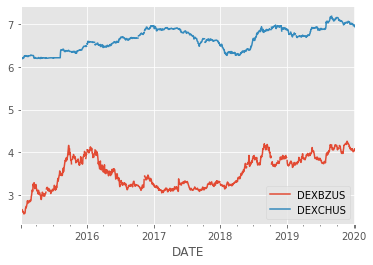

In [92]:
print(df.head())
df.plot()

In [93]:
df['BZUS_RET'] = np.log(df['DEXBZUS'] / df['DEXBZUS'].shift(1))
df['CHUS_RET'] = np.log(df['DEXCHUS'] / df['DEXCHUS'].shift(1))

In [126]:
df.fillna(0)

,DEXBZUS,DEXCHUS,BZUS_RET,CHUS_RET
DATE,,,,
2015-01-05,2.7284,6.2201,0.000000,0.000000
2015-01-06,2.7013,6.2125,-0.009982,-0.001223
2015-01-07,2.7000,6.2127,-0.000481,0.000032
2015-01-08,2.6635,6.2143,-0.013611,0.000258
2015-01-09,2.6375,6.2085,-0.009810,-0.000934
...,...,...,...,...
2020-01-06,4.0548,6.9749,0.004201,0.001435
2020-01-07,4.0813,6.9443,0.006514,-0.004397
2020-01-08,4.0463,6.9447,-0.008613,0.000058


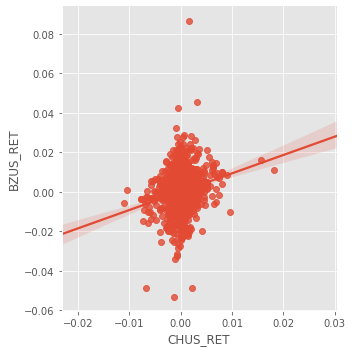

In [95]:
sns.lmplot(x='CHUS_RET',y='BZUS_RET',data=df)
fit_reg=True
hue='index'

In [129]:
import statsmodels.formula.api as sm
result = sm.ols(formula='BZUS_RET ~ CHUS_RET', data=df).fit()
print(result.params)
print(result.summary())

#R sq. of 0.04 means there is no explanatory power into the linear regression :(

Intercept    0.000106
CHUS_RET     0.928468
dtype: float64
                            OLS Regression Results                            
Dep. Variable:               BZUS_RET   R-squared:                       0.044
Model:                            OLS   Adj. R-squared:                  0.043
Method:                 Least Squares   F-statistic:                     55.02
Date:                Sat, 18 Jan 2020   Prob (F-statistic):           2.26e-13
Time:                        19:52:16   Log-Likelihood:                 3854.2
No. Observations:                1200   AIC:                            -7704.
Df Residuals:                    1198   BIC:                            -7694.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------

In [127]:
#Compute Beta as ( Std1 * Std2) / Cov12
( df['BZUS_RET'].std() * df['CHUS_RET'].std() ) / df['BZUS_RET'].cov(df['CHUS_RET'])

4.7723469503105385

In [128]:
#So for each unit of BRL we trade, we need 4.77 times the amount of CNH to get the same exposure